## MongoDB setup

In [1]:
from fcgb.setup.mongodb import setup_mongodb

setup_mongodb()

Index web-data-prod-index created in collection vec-web-data-prod.
Index web-data-dev-index created in collection vec-web-data-dev.
Index web-data-test-index created in collection vec-web-data-test.


## researcher class init

In [2]:
from fcgb.rag.precompiled import get_researcher

researcher = get_researcher(
    mode='test',
    db_engine='mongodb',
    chackpointer_mode='local',
    llm_model='fake',
    embedding_model='fake',
    search_engine='fake'
)

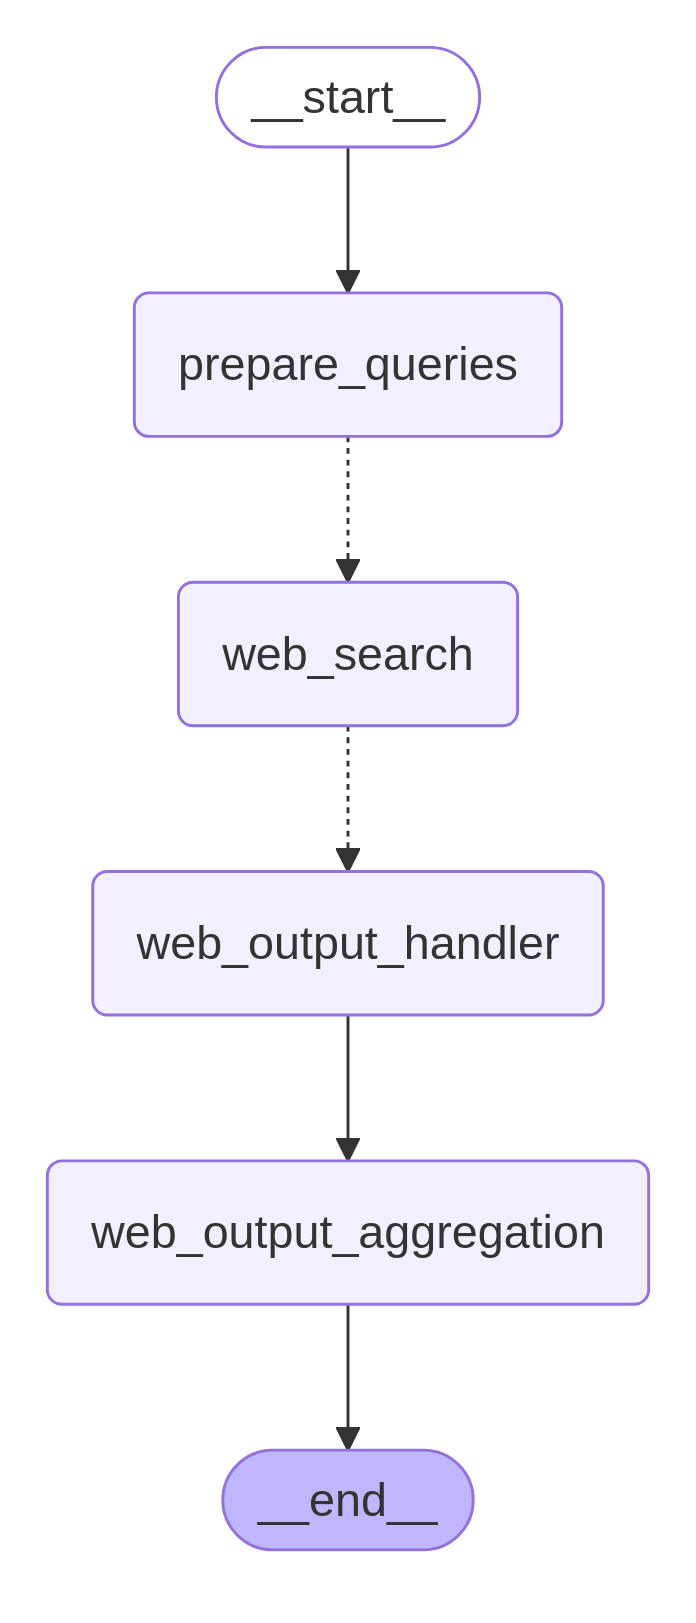

In [2]:
researcher.show_web_search_graph

### query

In [39]:
run_config = {'configurable': {'thread_id': 'dev/thread_test1', 'user_id': 'dev/user_test2'}}
web_search_inputs = {
    'main_question': "Some main question",
    'current_question': "Some current question",
    "template_inputs": {'irrelevant_input': 'nothing interesting'}
}

In [40]:
result = researcher.web_search_graph.invoke(input=web_search_inputs, config=run_config)

run_web_search {'current_question': 'Some current question', 'query': 'Fake string zdefh'}
url_responses_routing responses=[WebSearchOutputHandlerState(current_question='Some current question', query='Fake string zdefh', url='https://fake-url-0-hshbi.com', url_content='Fake raw content 0 gwftt'), WebSearchOutputHandlerState(current_question='Some current question', query='Fake string zdefh', url='https://fake-url-1-zjsrg.com', url_content='Fake raw content 1 svapr'), WebSearchOutputHandlerState(current_question='Some current question', query='Fake string zdefh', url='https://fake-url-2-gjash.com', url_content='Fake raw content 2 cppal')]
run_web_search {'current_question': 'Some current question', 'query': 'Fake string kyuly'}
url_responses_routing responses=[WebSearchOutputHandlerState(current_question='Some current question', query='Fake string kyuly', url='https://fake-url-0-bprsg.com', url_content='Fake raw content 0 ddgju'), WebSearchOutputHandlerState(current_question='Some curre

In [41]:
researcher.memory.get(run_config)

{'v': 3,
 'ts': '2025-05-16T12:32:59.846694+00:00',
 'id': '1f03251e-70ac-627c-8004-c3f547c7a7cf',
 'channel_versions': {'__start__': '00000000000000000000000000000002.0.8187215333643709',
  'main_question': '00000000000000000000000000000002.0.6088468154412132',
  'current_question': '00000000000000000000000000000002.0.18859530636540345',
  'template_inputs': '00000000000000000000000000000002.0.7240920751438236',
  'branch:to:prepare_queries': '00000000000000000000000000000003.0.10100555990369564',
  'queries': '00000000000000000000000000000003.0.4539251956944129',
  'responses': '00000000000000000000000000000006.0.6681007661614768',
  'documents': '00000000000000000000000000000006.0.30493701375514815',
  'branch:to:web_output_aggregation': '00000000000000000000000000000006.0.12792959721896768',
  'retreived_content': '00000000000000000000000000000006.0.8730351788301108'},
 'versions_seen': {'__input__': {},
  '__start__': {'__start__': '00000000000000000000000000000001.0.2163661978915

In [42]:
result

{'main_question': 'Some main question',
 'current_question': 'Some current question',
 'template_inputs': {'irrelevant_input': 'nothing interesting'},
 'documents': [],
 'retreived_content': ['Content from https://fake-url-0-hshbi.com:\n\nFake string xcrtd\n\nSources:\nFake string oyoup\n',
  'Content from https://fake-url-2-gjash.com:\n\nFake string iamax\n\nSources:\nFake string juqkq\n',
  'Content from https://fake-url-1-pcwza.com:\n\nFake string krgib\n\nSources:\nFake string gychd\n',
  'Content from https://fake-url-2-behui.com:\n\nFake string aifxr\n\nSources:\nFake string byssc\n',
  'Content from https://fake-url-0-uyxgi.com:\n\nFake string ypcyz\n\nSources:\nFake string qpwnd\n']}

### retreival

In [3]:
rag = researcher.rag_module

In [4]:
rag.drop_index('test_web-data-index')

Index test_web-data-index dropped from collection test-vec-web-data.


In [6]:
rag_output = rag.retreive(
            query="Some query",
            index_name=researcher.rag_kwargs['search_index_name'],
            source_field='description',
            limit=5,
            threshold=0.530,
            filters={'thread_id': 'dev/thread_test2'}
        )

rag_output

[{'_id': ObjectId('68249d99cf6f280a8042c280'),
  'is_relevant': True,
  'relevant_content': 'Fake string uvngg',
  'references': 'Fake string vszxn',
  'description': 'Fake string bwdwd',
  'url': 'https://fake-url-4-becjd.com',
  'query': 'Fake string huurk',
  'thread_id': 'dev/thread_test2',
  'user_id': 'dev/user_test2',
  'created_at': Timestamp(1747230105, 1),
  'score': 0.5415710210800171},
 {'_id': ObjectId('68249d99cf6f280a8042c282'),
  'is_relevant': True,
  'relevant_content': 'Fake string nqpta',
  'references': 'Fake string sycvp',
  'description': 'Fake string zrycb',
  'url': 'https://fake-url-4-myzcd.com',
  'query': 'Fake string zvjiu',
  'thread_id': 'dev/thread_test2',
  'user_id': 'dev/user_test2',
  'created_at': Timestamp(1747230105, 1),
  'score': 0.536381185054779}]

In [4]:
from fcgb.rag.precompiled import get_db_client, get_embedding_model
from fcgb.cfg.vars import mongodb_rag_config

db = get_db_client('mongodb')[mongodb_rag_config.test['collection']]
embedding_model = get_embedding_model('fake')
vector_field_name = rag._assign_vector_field_name('description')
query_vector = embedding_model.embed_query("Some query")
index_name = researcher.rag_kwargs['search_index_name']

print('vector_field_name', vector_field_name)
print('query_vector', len(query_vector), type(query_vector))
print('index_name', index_name)

filters = {'thread_id': 'dev/thread_test2'}

vector_field_name description_vector
query_vector 768 <class 'list'>
index_name test-web-data-index


In [5]:
vec_fields_filter = {vec_field['vec_path']: 0 for vec_field in rag.get_vec_fields(index_name)}
print('vec_fields', vec_fields_filter)

vec_fields {'relevant_content_vector': 0, 'description_vector': 0}


In [19]:
init_filters = [{'$match': filters}]
search_stage = [{
            '$vectorSearch': {
                'index': index_name,
                'path': vector_field_name,
                'queryVector': query_vector,
                'exact': True,
                'filter': filters,
                "limit": 5
            }
        }]

output_stage = [{
            '$project': {'score': {'$meta': 'vectorSearchScore'}} | vec_fields_filter
        }]

threshold_filter = [{'$match': {"score": {"$gt": 0.1}}}]

In [20]:
list(db.aggregate(search_stage+output_stage+threshold_filter))

[{'_id': ObjectId('68249d99cf6f280a8042c286'),
  'is_relevant': True,
  'relevant_content': 'Fake string clwba',
  'references': 'Fake string alspu',
  'description': 'Fake string fdevl',
  'url': 'https://fake-url-3-natbu.com',
  'query': 'Fake string hhyck',
  'thread_id': 'dev/thread_test2',
  'user_id': 'dev/user_test2',
  'created_at': Timestamp(1747230105, 1),
  'score': 0.5432464480400085},
 {'_id': ObjectId('68249fe4cf6f280a8042c289'),
  'is_relevant': True,
  'relevant_content': 'Fake string ytrwi',
  'references': 'Fake string jaeco',
  'description': 'Fake string jrhyp',
  'url': 'https://fake-url-2-fdggl.com',
  'query': 'Fake string blyto',
  'thread_id': 'dev/thread_test2',
  'user_id': 'dev/user_test2',
  'created_at': Timestamp(1747230692, 1),
  'score': 0.5389261841773987},
 {'_id': ObjectId('68249d99cf6f280a8042c281'),
  'is_relevant': True,
  'relevant_content': 'Fake string llsav',
  'references': 'Fake string ukuug',
  'description': 'Fake string xmnor',
  'url': '

In [22]:
list(db.aggregate(init_filters))[0]

{'_id': ObjectId('68249b2bcf6f280a8042c278'),
 'is_relevant': True,
 'relevant_content': 'Fake string ollkr',
 'references': 'Fake string icdcz',
 'description': 'Fake string waiol',
 'url': 'https://fake-url-0-oharz.com',
 'query': 'Fake string ywqet',
 'thread_id': 'dev/thread_test2',
 'user_id': 'dev/user_test2',
 'relevant_content_vector': [0.6279652896390608,
  0.33552123130864997,
  0.1561318135572316,
  0.13874055767746252,
  -0.8377785604603798,
  -0.20820193032531886,
  0.4546561837445333,
  -0.6186707022267721,
  0.23747292190398372,
  0.5248897357457563,
  0.7686462874485487,
  0.6670241737839202,
  0.4920750735074477,
  -0.26700489975245434,
  -0.7646295445869009,
  0.9420442424866837,
  0.4230784802740688,
  -0.26083256657758924,
  -0.35702958210980174,
  0.2567073219972147,
  -0.3363476741065081,
  -0.5041163013516894,
  -0.3513842622210477,
  0.3748706405945603,
  0.5862703626073582,
  -0.08963446293521082,
  -0.002361875336581276,
  -0.8130063846901021,
  0.639524677424